In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import csv

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
filename_test_binary = "glue_data/SST-2/test.tsv"
filename_test_fine_grained = "glue_data/SST-5/test.tsv"

In [3]:
def get_labels_and_sentences(tsvfile):
    labels = []
    sentences = []
    with open(tsvfile, mode ='r') as file_to_read: 
        file = csv.reader(file_to_read, delimiter='\t') 
        for idx, line in enumerate(file):
            if idx == 0:
                continue
            labels.append(line[0])
            sentences.append(line[1])
            
    return labels, sentences

In [4]:
binary_labels, binary_sentences = get_labels_and_sentences(filename_test_binary)
fg_labels, fg_sentences = get_labels_and_sentences(filename_test_fine_grained)

print(len(binary_labels))

2210


In [5]:
df_bert_test_binary = pd.DataFrame({
     'label': binary_labels,
     'text': binary_sentences
})

df_bert_test_binary.head()

,label,text
0,0,effective but too-tepid biopic
1,1,if you sometimes like to go to the movies to h...
2,1,"emerges as something rare , an issue movie tha..."
3,0,the film provides some great insight into the ...
4,1,offers that rare combination of entertainment ...


In [6]:
df_bert_test_fg = pd.DataFrame({
     'label': fg_labels,
     'text': fg_sentences
})

df_bert_test_fg.head()

,label,text
0,2,effective but too-tepid biopic
1,3,if you sometimes like to go to the movies to h...
2,4,"emerges as something rare , an issue movie tha..."
3,2,the film provides some great insight into the ...
4,4,offers that rare combination of entertainment ...


2210
[[1033  268]
 [ 102  807]]
Accuracy for SST-2 root nodes: 0.832579185520362


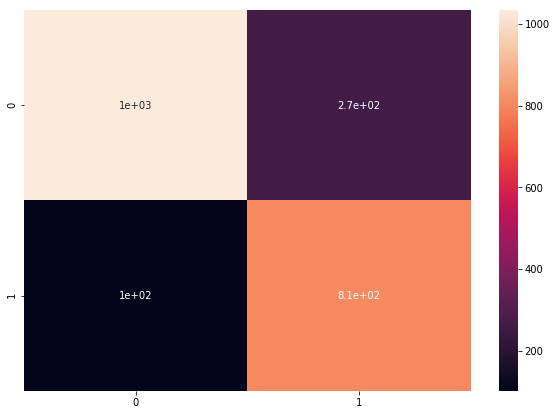

In [12]:
path_to_binary_result = "bert_output_binary/test_results.tsv"

label_results=[]
pd.DataFrame()

with open(path_to_binary_result) as file:
    result = csv.reader(file, delimiter="\t")
    for row in result:
        data =[float(i) for i in row]
        label_results.append(np.argmax(data))

print(len(label_results))
df_results=pd.DataFrame()
df_results=pd.DataFrame(label_results)
df_results[0]

for i in range(0, len(binary_labels)): 
     binary_labels[i] = int(binary_labels[i])

cm = confusion_matrix(binary_labels, df_results[0])
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Accuracy for SST-2 root nodes:", metrics.accuracy_score(binary_labels, df_results[0]))

2210
[[101 123  36  17   2]
 [ 98 336 108  74  17]
 [ 22 136 107 102  22]
 [ 16  52  67 286  89]
 [  6  19  19 171 184]]

Accuracy for SST-5: 0.4588


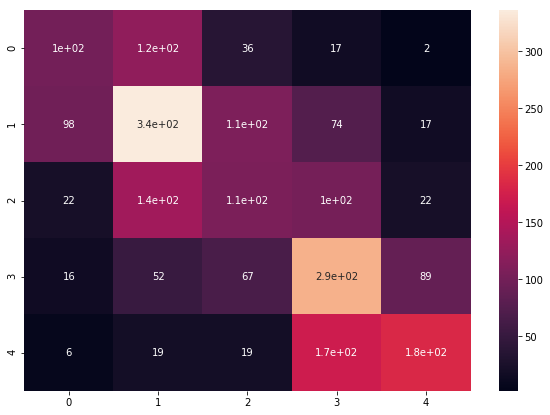

In [11]:
path_to_binary_result = "bert_fine_grained/small_bert/test_results.tsv"

label_results=[]
pd.DataFrame()

with open(path_to_binary_result) as file:
    result = csv.reader(file, delimiter="\t")
    for row in result:
        data =[float(i) for i in row]
        label_results.append(np.argmax(data))

print(len(label_results))
df_results=pd.DataFrame()
df_results=pd.DataFrame(label_results)
df_results[0]

for i in range(0, len(fg_labels)): 
     fg_labels[i] = int(fg_labels[i])

cm = confusion_matrix(fg_labels, df_results[0])
df_cm = pd.DataFrame(cm, index = [i for i in "01234"],
                  columns = [i for i in "01234"])
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print()
print("Accuracy for SST-5: %.4f" % metrics.accuracy_score(fg_labels, df_results[0]))